In [2]:
import os
import torch
import pandas as pd
import torch.nn as nn
import numpy as np
from age_prediction.models.\
    efficientnet_pytorch_3d import EfficientNet3D as EfNetB0
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def MAE_pred(y_pred, y_true):
    mae = nn.L1Loss(reduction='mean')(y_pred, y_true).cpu().detach().numpy().item()
    return mae
def MSE_pred(y_pred, y_true):
    mse = nn.MSELoss()(y_pred, y_true).cpu().detach().numpy().item()
    return mse
def delta_pred(y_pred, y_true):
    delta = y_pred - y_true
    return np.mean(delta)

In [4]:
def ensemble(left, right):
    right = right[['Name', 'Pred']]
    ensemble = pd.merge(left, right, on=['Name'], suffixes=("_L", "_R"))
    ensemble['Pred'] = ensemble.apply(lambda x: (x['Pred_L']+x['Pred_R'])/2, axis=1)
    return ensemble

In [5]:
def metrics(preds):
    print("MAE", MAE_pred(torch.from_numpy(preds['Pred'].values), torch.from_numpy(preds['True'].values)))
    print("MSE", MSE_pred(torch.from_numpy(preds['Pred'].values), torch.from_numpy(preds['True'].values)))
    print("Delta", delta_pred(preds['Pred'], preds['True']))

In [6]:
def plot_regression(x, y):
    slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
    # intercept = 0
    # slope = 1
    line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
    line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
    fig, ax = plt.subplots()
    ax.plot(x, y, linewidth=0, marker='s', label='Data points')
    ax.plot(x, intercept + slope * x, label=line)
    ax.set_xlabel('Chronological age')
    ax.set_ylabel('Estimated age')
    ax.legend(facecolor='white')
    plt.show()

In [7]:
def bias_corr(pred):
    a = 0.41
    b = 45.42
    return pd.Series((pred - b)/a)

Left
MAE 4.707437243243244
MSE 41.43305609948867
Delta -0.30682943243243266


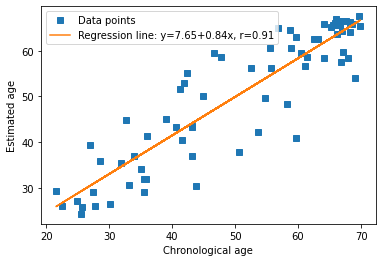

Right
MAE 4.556885905405406
MSE 38.98392953925121
Delta 0.4433662027027024


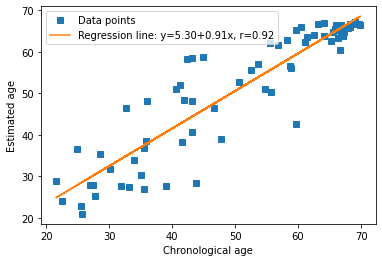

Left+Right
MAE 3.941624047297299
MSE 29.01025738182311
Delta 0.06826838513513432


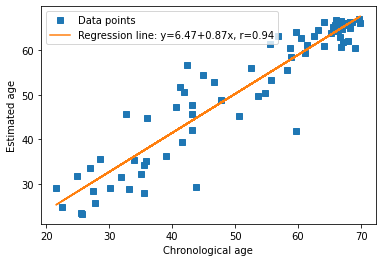

In [8]:
# Validation 0-70
val_L = pd.read_csv("predict_results/val_0-70_L.csv")
val_R = pd.read_csv("predict_results/val_0-70_R.csv")
ens = ensemble(val_L, val_R)
ens.to_csv('predict_results/val_0-70_LR.csv', index=False)
print("Left")
metrics(val_L)
plot_regression(val_L['True'], val_L['Pred'])
print("Right")
metrics(val_R)
plot_regression(val_R['True'], val_R['Pred'])
print("Left+Right")
metrics(ens)
plot_regression(ens['True'], ens['Pred'])

Left
MAE 3.92842898013245
MSE 25.579362089656264
Delta 0.9215553907284763


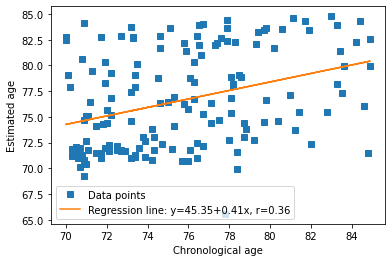

Right
MAE 3.5481887284768217
MSE 21.35378393995642
Delta -1.1338471125827818


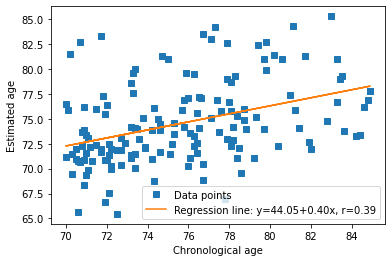

Left+Right
MAE 3.3587705231788076
MSE 17.94599709666341
Delta -0.1061458609271526


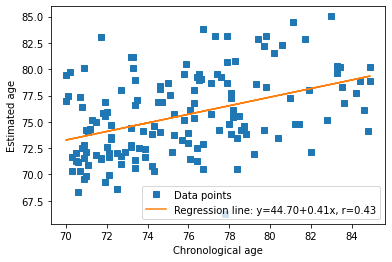

In [8]:
# Validation 70-100
val_L = pd.read_csv("predict_results/val_exp_L.csv")
val_R = pd.read_csv("predict_results/val_exp_R.csv")
ens = ensemble(val_L, val_R)
ens.to_csv('predict_results/val_exp_LR.csv', index=False)
print("Left")
metrics(val_L)
plot_regression(val_L['True'], val_L['Pred'])
print("Right")
metrics(val_R)
plot_regression(val_R['True'], val_R['Pred'])
print("Left+Right")
metrics(ens)
plot_regression(ens['True'], ens['Pred'])

Left
MAE 4.477334695364239
MSE 30.201664425782905
Delta 1.0984416225165567


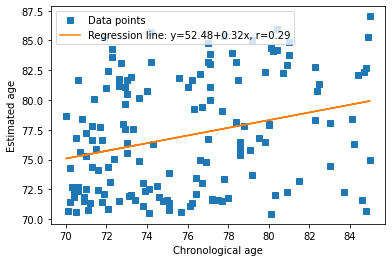

Right
MAE 3.692468516556291
MSE 22.78966583112645
Delta -1.5773569536423828


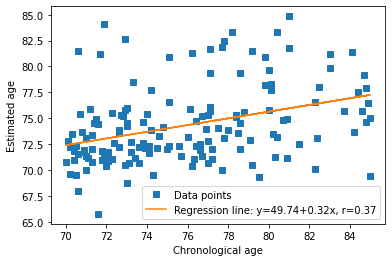

Left+Right
MAE 3.509057533112582
MSE 19.08811899573441
Delta -0.23945766556291279


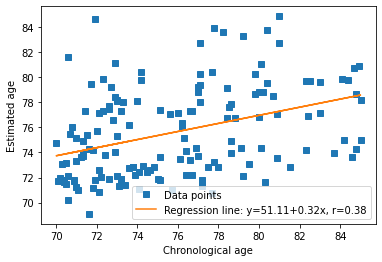

Min 70.0 / 69.09328500000001 Max 85.0 / 84.881268


In [9]:
# Test 0-70
val_L = pd.read_csv("predict_results/test_exp_L.csv")
val_R = pd.read_csv("predict_results/test_exp_R.csv")
ens = ensemble(val_L, val_R)
ens.to_csv('predict_results/test_exp_LR.csv', index=False)
print("Left")
metrics(val_L)
plot_regression(val_L['True'], val_L['Pred'])
print("Right")
metrics(val_R)
plot_regression(val_R['True'], val_R['Pred'])
print("Left+Right")
metrics(ens)
plot_regression(ens['True'], ens['Pred'])
print("Min", ens['True'].min(), "/", ens['Pred'].min(),
      "Max", ens['True'].max(), "/", ens['Pred'].max())

Left
MAE 5.699224411483253
MSE 48.25934204873231
Delta 4.396512382775119


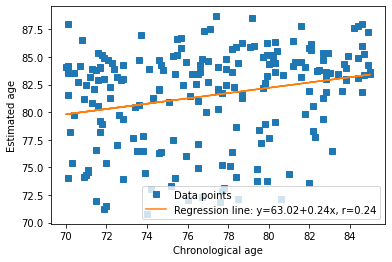

Right
MAE 4.559458516746411
MSE 31.09246814015029
Delta 2.3196649473684214


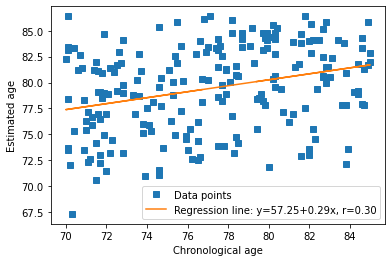

Left+Right
MAE 4.658749363636364
MSE 33.87118613280338
Delta 3.35808866507177


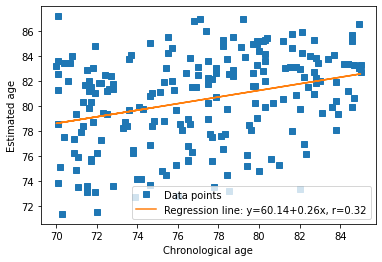

In [11]:
# AD
val_L = pd.read_csv("predict_results/ad_images_L.csv")
val_R = pd.read_csv("predict_results/ad_images_R.csv")
ens = ensemble(val_L, val_R)
ens.to_csv('predict_results/ad_images_LR.csv', index=False)
print("Left")
metrics(val_L)
plot_regression(val_L['True'], val_L['Pred'])
print("Right")
metrics(val_R)
plot_regression(val_R['True'], val_R['Pred'])
print("Left+Right")
metrics(ens)
plot_regression(ens['True'], ens['Pred'])

Min 70.0 / 71.357012 Max 85.0 / 87.16823


(69.0, 91.0)

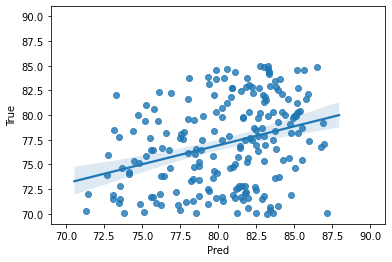

In [12]:
print("Min", ens['True'].min(), "/", ens['Pred'].min(),
      "Max", ens['True'].max(), "/", ens['Pred'].max())
ax = sns.regplot(x="Pred", y="True", data=ens)
ax.set_xlim(69, 91)
ax.set_ylim(69, 91)

Left
MAE 5.243145494023905
MSE 43.62505732102133
Delta 3.5850374701195213


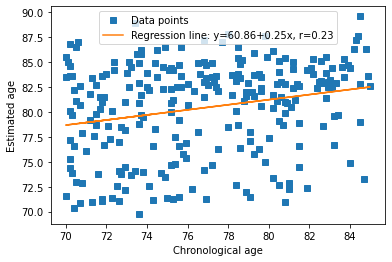

Right
MAE 4.732870047808764
MSE 35.336369029477055
Delta 1.4572912828685256


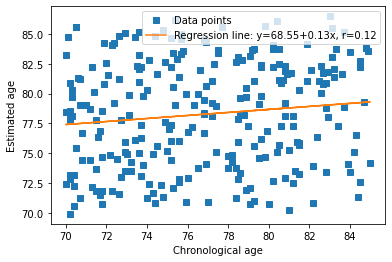

Left+Right
MAE 4.511778484063745
MSE 32.11629277516686
Delta 2.5211643764940237


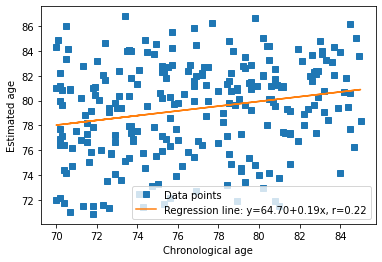

Min 70.0 / 70.88492500000001 Max 85.0 / 86.78855250000001


In [13]:
# MCI
val_L = pd.read_csv("predict_results/mci_images_L.csv")
val_R = pd.read_csv("predict_results/mci_images_R.csv")
ens = ensemble(val_L, val_R)
ens.to_csv('predict_results/mci_images_LR.csv', index=False)
print("Left")
metrics(val_L)
plot_regression(val_L['True'], val_L['Pred'])
print("Right")
metrics(val_R)
plot_regression(val_R['True'], val_R['Pred'])
print("Left+Right")
metrics(ens)
plot_regression(ens['True'], ens['Pred'])
print("Min", ens['True'].min(), "/", ens['Pred'].min(),
      "Max", ens['True'].max(), "/", ens['Pred'].max())